In [2]:
datadir ='/Users/krithigamurugavel/Downloads/gem5_validation_project/WINTER2020/Memorybenchmarks_tests/'

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os


In [4]:
import matplotlib

In [5]:
Configuration_names = ['run_allbenchmarks','run_contrlbenchmarks','run_memorybenchmarks','run_micro']

zm_config= 'run_memorybenchmarks'

all_arch = ['X86','ARM-32','RISCV']
zm_arch = ['X86']


all_memory_models = ['Slow', 'SingleCycle', 'Inf', 'Slow']
zm_memory_models = ['Slow']

all_type_of_cache =['L1_cache','L2_cache','Assoc','LI_cache']
type_of_cache = ['L1_cache'] 

L1D_cache_sizes = ['32kB','4kB','64kB']

L2_cache_sizes = ['1MB', '512kB']

Assoc = ['Assoc_8','Assoc_16']

LI_cache_size = ['32kB','128kB']

L2_cache_size = ['512kB', '1MB']

all_benchmarks = ['CCa','CCe','CCm','CCh_st','CRm','CRf','CF1','CS1','CS3','EI','EF','ED1','EM1','EM5',
                     'DP1d','DP1f','DPcvt','DPTd','DPT','MI','MIM','MIM2','MIP','MC','MCS','MI','MIM','MIM2','MIP','MD','ML2','ML2_BW_ld',
                        'ML2_BW_st','MM']
memory_benchmarks= ['MI','MIM','MIM2','MIP','MC','MCS','MI','MIM','MIM2','MIP','MD','ML2','ML2_BW_ld',
                        'ML2_BW_st','MM']

L1D_cache =['MIM','MIM2','MD','MI'] 

L1D_conflictmisses = ['MC','MCS']

LI_cache = ['MIP']

L2_cache = ['ML2_BW_ld','ML2_BW_ldst',
                        'ML2_BW_st']



all_gem5_cpus = ['Simple','DefaultO3','Minor']
zm_gem5_cpus = ['Simple','DefaultO3']


In [6]:
#Function to extract stats
def gem5GetStat(filename, stat):
    filename = os.path.join(datadir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 1
        end = r.find('#', start)
       # print(r[start:end])
        return float(r[start:end])
    

### L1D cache capacity misses

In [8]:
# for L1D cache capacity misses

rows = []

for arch in zm_arch:
    for mem in zm_memory_models:
        for bm in memory_benchmarks :   
            for sys in zm_gem5_cpus:
                for c in type_of_cache:
                    for size in L1D_cache_sizes: 
                        rows.append([arch,mem,bm, sys,c,size,
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_ticks')/333, #1000
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_insts'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_ops'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_ticks'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'host_op_rate'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+ '/'+sys+'/'+c+'/'+size,'system.cpu.l1d.overall_miss_rate::total'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+ '/'+sys+'/'+c+'/'+size,'system.cpu.l1d.overall_mshr_miss_rate::total'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+ '/'+sys+'/'+c+'/'+size,'system.cpu.l1d.overall_avg_miss_latency::total'),
                                        ])

vrg_df = pd.DataFrame(rows, columns=['arch','mem','benchmark','cpu','cache_type','size',
                                      'cycles', 'instructions', 'ops','time','host_op_rate', 'overall_l1d_missrate',
                                     'overall_l1d_mshr_missrate','l1d_avg_latency'])
print(vrg_df)
vrg_df['ipc'] = vrg_df['instructions']/vrg_df['cycles']
vrg_df['cpi']= 1/vrg_df['ipc']

   arch   mem  benchmark        cpu cache_type  size      cycles  \
0   X86  Slow         MI     Simple   L1_cache  32kB   1106978.0   
1   X86  Slow         MI     Simple   L1_cache   4kB   1158807.0   
2   X86  Slow         MI     Simple   L1_cache  64kB   1106978.0   
3   X86  Slow         MI  DefaultO3   L1_cache  32kB    730881.0   
4   X86  Slow         MI  DefaultO3   L1_cache   4kB    781780.0   
5   X86  Slow         MI  DefaultO3   L1_cache  64kB    730881.0   
6   X86  Slow        MIM     Simple   L1_cache  32kB    751811.0   
7   X86  Slow        MIM     Simple   L1_cache   4kB    753520.0   
8   X86  Slow        MIM     Simple   L1_cache  64kB    751811.0   
9   X86  Slow        MIM  DefaultO3   L1_cache  32kB    633168.0   
10  X86  Slow        MIM  DefaultO3   L1_cache   4kB    633558.0   
11  X86  Slow        MIM  DefaultO3   L1_cache  64kB    633168.0   
12  X86  Slow       MIM2     Simple   L1_cache  32kB    656796.0   
13  X86  Slow       MIM2     Simple   L1_cache  

### LI cache dataframe

In [56]:
#LI - cache
rows = []

for arch in zm_arch:
    for mem in zm_memory_models:
        for bm in LI_cache :   
            for sys in zm_gem5_cpus:
                for c in type_of_cache:
                    for size in LI_cache_size:
                        rows.append([arch,mem,bm, sys,c,size,
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_ticks')/333, #1000
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_insts'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_ops'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_ticks'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'host_op_rate'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+ '/'+sys+'/'+c+'/'+size,'system.cpu.l1d.overall_miss_rate::total'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+ '/'+sys+'/'+c+'/'+size,'system.cpu.l1d.overall_mshr_miss_rate::total'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+ '/'+sys+'/'+c+'/'+size,'system.cpu.l1d.overall_avg_miss_latency::total'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+ '/'+sys+'/'+c+'/'+size,'system.cpu.l1i.overall_miss_rate::total ')
                                         
                                    ])

vrg_df = pd.DataFrame(rows, columns=['arch','mem','benchmark','cpu','cache_type','size',
                                      'cycles', 'instructions', 'ops','time','host_op_rate', 'overall_l1d_missrate',
                                     'overall_l1d_mshr_missrate','l1d_avg_latency','overall_li_missrate'])
print(vrg_df)
vrg_df['ipc'] = vrg_df['instructions']/vrg_df['cycles']
vrg_df['cpi']= 1/vrg_df['ipc']


  arch   mem benchmark        cpu cache_type   size    cycles  instructions  \
0  X86  Slow       MIP     Simple   LI_cache   32kB  381478.0       83122.0   
1  X86  Slow       MIP     Simple   LI_cache  128kB  381478.0       83122.0   
2  X86  Slow       MIP  DefaultO3   LI_cache   32kB  324372.0       83121.0   
3  X86  Slow       MIP  DefaultO3   LI_cache  128kB  324296.0       83121.0   

        ops         time  host_op_rate  overall_l1d_missrate  \
0  133461.0  127032174.0     1035999.0              0.091176   
1  133461.0  127032174.0     1035999.0              0.091176   
2  133460.0  108015876.0      257976.0              0.116656   
3  133460.0  107990568.0      272089.0              0.116514   

   overall_l1d_mshr_missrate  l1d_avg_latency  overall_li_missrate  
0                   0.091176     49314.691244             0.013649  
1                   0.091176     49314.691244             0.013649  
2                   0.073178     50041.771654             0.698364  
3      

###  Conflict miss dataframe

In [ ]:
# for conflict misses
rows = []

for arch in zm_arch:
    for mem in zm_memory_models:
        for bm in L1D_conflictmisses :   
            for sys in zm_gem5_cpus:
                for c in type_of_cache:
                    for size in Assoc:
                        rows.append([arch,mem,bm, sys,c,size,
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_ticks')/333, #1000
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_insts'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_ops'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_ticks'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'host_op_rate'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+ '/'+sys+'/'+c+'/'+size,'system.cpu.l1d.overall_miss_rate::total'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+ '/'+sys+'/'+c+'/'+size,'system.cpu.l1d.overall_mshr_miss_rate::total'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+ '/'+sys+'/'+c+'/'+size,'system.cpu.l1d.overall_avg_miss_latency::total')
                                        ])

vrg_df = pd.DataFrame(rows, columns=['arch','mem','benchmark','cpu','cache_type','size',
                                      'cycles', 'instructions', 'ops','time','host_op_rate', 'overall_l1d_missrate',
                                     'overall_l1d_mshr_missrate','l1d_avg_latency'])
print(vrg_df)
vrg_df['ipc'] = vrg_df['instructions']/vrg_df['cycles']
vrg_df['cpi']= 1/vrg_df['ipc']


### L2 cache

In [22]:
# for L2 cache
rows = []

for arch in zm_arch:
    for mem in zm_memory_models:
        for bm in L2_cache :   
            for sys in zm_gem5_cpus:
                for c in type_of_cache:
                    for size in L2_cache_sizes:
                        rows.append([arch,mem,bm, sys,c,size,
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_ticks')/333, #1000
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_insts'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_ops'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'sim_ticks'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+'/'+sys+'/'+c+'/'+size, 'host_op_rate'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+ '/'+sys+'/'+c+'/'+size,'system.l2cache.overall_miss_rate::total'),
                                         gem5GetStat(arch+'/'+zm_config+'/'+mem+'/'+bm+ '/'+sys+'/'+c+'/'+size,'system.l2cache.overall_avg_miss_latency::total')
                                        ])

vrg_df = pd.DataFrame(rows, columns=['arch','mem','benchmark','cpu','cache_type','size',
                                      'cycles', 'instructions', 'ops','time','host_op_rate',
                                     'overall_miss_rate_L2','overall_avg_miss_latency_L2'])
print(vrg_df)
vrg_df['ipc'] = vrg_df['instructions']/vrg_df['cycles']
vrg_df['cpi']= 1/vrg_df['ipc']

   arch   mem    benchmark        cpu cache_type   size     cycles  \
0   X86  Slow    ML2_BW_ld     Simple   L2_cache    1MB  5350542.0   
1   X86  Slow    ML2_BW_ld     Simple   L2_cache  512kB  6523347.0   
2   X86  Slow    ML2_BW_ld  DefaultO3   L2_cache    1MB  4348225.0   
3   X86  Slow    ML2_BW_ld  DefaultO3   L2_cache  512kB  5523515.0   
4   X86  Slow  ML2_BW_ldst     Simple   L2_cache    1MB  5711471.0   
5   X86  Slow  ML2_BW_ldst     Simple   L2_cache  512kB  6912942.0   
6   X86  Slow  ML2_BW_ldst  DefaultO3   L2_cache    1MB  4121826.0   
7   X86  Slow  ML2_BW_ldst  DefaultO3   L2_cache  512kB  5353372.0   
8   X86  Slow    ML2_BW_st     Simple   L2_cache    1MB  4617098.0   
9   X86  Slow    ML2_BW_st     Simple   L2_cache  512kB  5840502.0   
10  X86  Slow    ML2_BW_st  DefaultO3   L2_cache    1MB  3557304.0   
11  X86  Slow    ML2_BW_st  DefaultO3   L2_cache  512kB  4800710.0   

    instructions        ops          time  host_op_rate  overall_miss_rate_L2  \
0      1

In [12]:
#plotting all Benchmark
def doplot_benchmarks(benchmarks,benchmark_names,cpu,stat,cache_modified,sizes,norm=False):
    plt.figure()
    i = 0
    for bm in benchmarks:
        if norm:
            base = vrg_df[stat].iloc[0]
        else:
            base = 1
        for j,s in enumerate(sizes):
            d = vrg_df[(vrg_df['cpu']==sys) & (vrg_df['benchmark']==bm) & (vrg_df['cache_type']==cache_modified )
                                                                           & (vrg_df['size']==s)]
            plt.bar(i, d[stat]/base, color='C'+str(j))
            i += 1
        i += 1
        
    for i,s in enumerate(sizes):
        plt.bar(0,0,color='C'+str(i), label=s)
    #new_names = benchmark_names + benchmark_names + benchmark_names
    plt.xticks(np.arange(len(benchmark_names))*(len(sizes)+1)+i/2, benchmark_names, rotation=40, ha='right')

# L1D Cache

## SimpleCPU : L1D missrate.

<IPython.core.display.Javascript object>


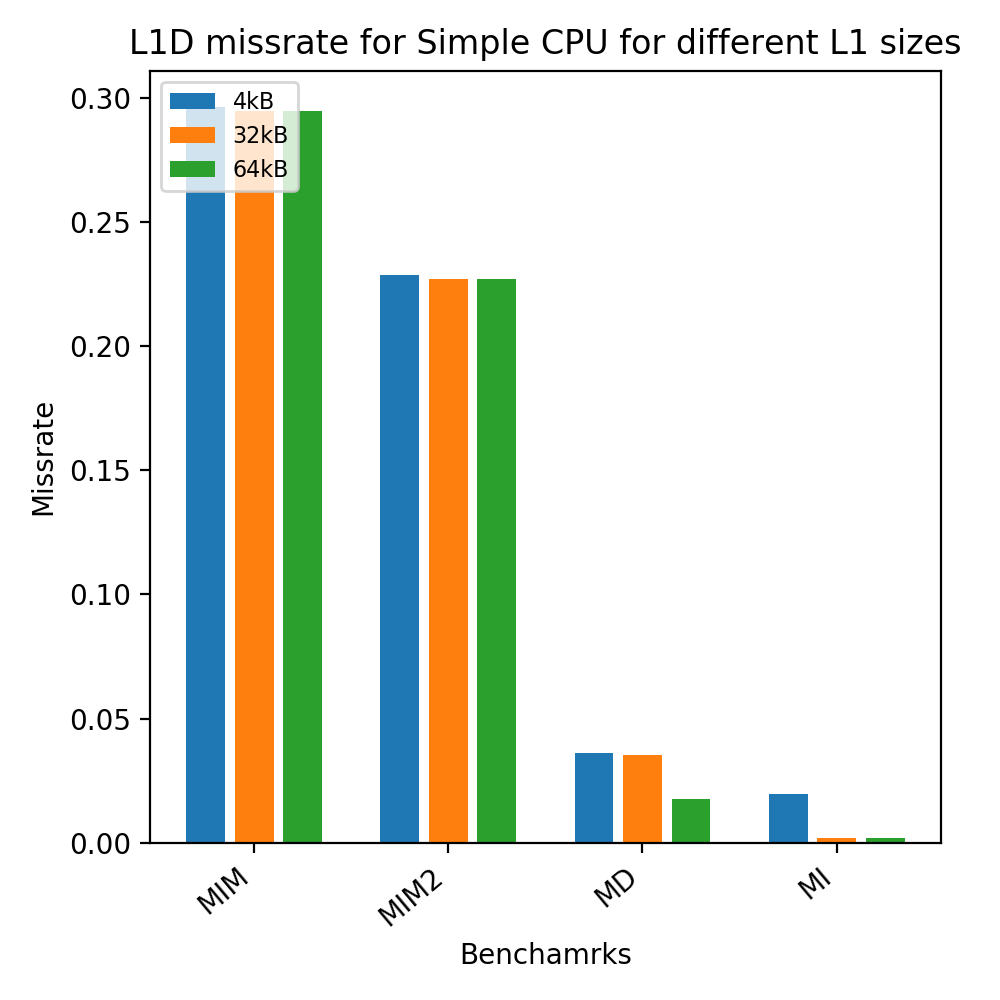

In [20]:
#Simple Benchmark L1D missrate.

benchmarks = L1D_cache
benchmark_names =  L1D_cache
sizes = ['4kB','32kB','64kB']
cpu = ['Simple']
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,cpu,'overall_l1d_missrate','L1_cache',sizes,norm=False)
plt.ylabel('Missrate')
plt.xlabel('Benchamrks')
plt.legend(loc=2, prop={'size': 8})
plt.title('L1D missrate for Simple CPU for different L1 sizes')
plt.tight_layout()
plt.savefig('L1D_misses_Simple.png', format='png', dpi=600)

## SimpleCPU: L1D mshr_missrate.

<IPython.core.display.Javascript object>


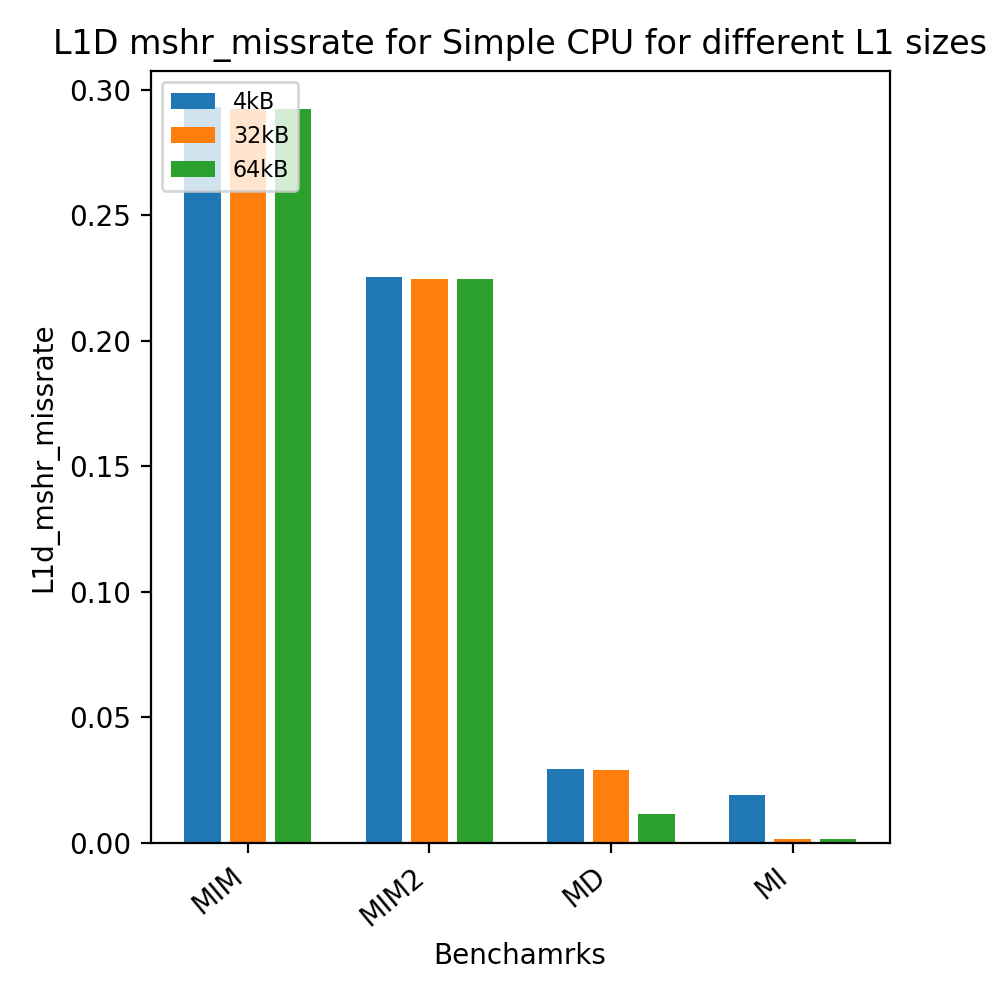

In [78]:
#Simple Benchmark L1D mshr_missrate.

benchmarks = L1D_cache
benchmark_names =  L1D_cache
sizes = ['4kB','32kB','64kB']
cpu = ['Simple']
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,cpu,'overall_l1d_mshr_missrate','L1_cache',sizes,norm=False)
plt.ylabel('L1d_mshr_missrate')
plt.xlabel('Benchamrks')
plt.legend(loc=2, prop={'size': 8})
plt.title('L1D mshr_missrate for Simple CPU for different L1 sizes')
plt.tight_layout()
plt.savefig('L1D_mshr_misses_Simple.png', format='png', dpi=600)

## DefaultO3 : L1D missrate 

<IPython.core.display.Javascript object>


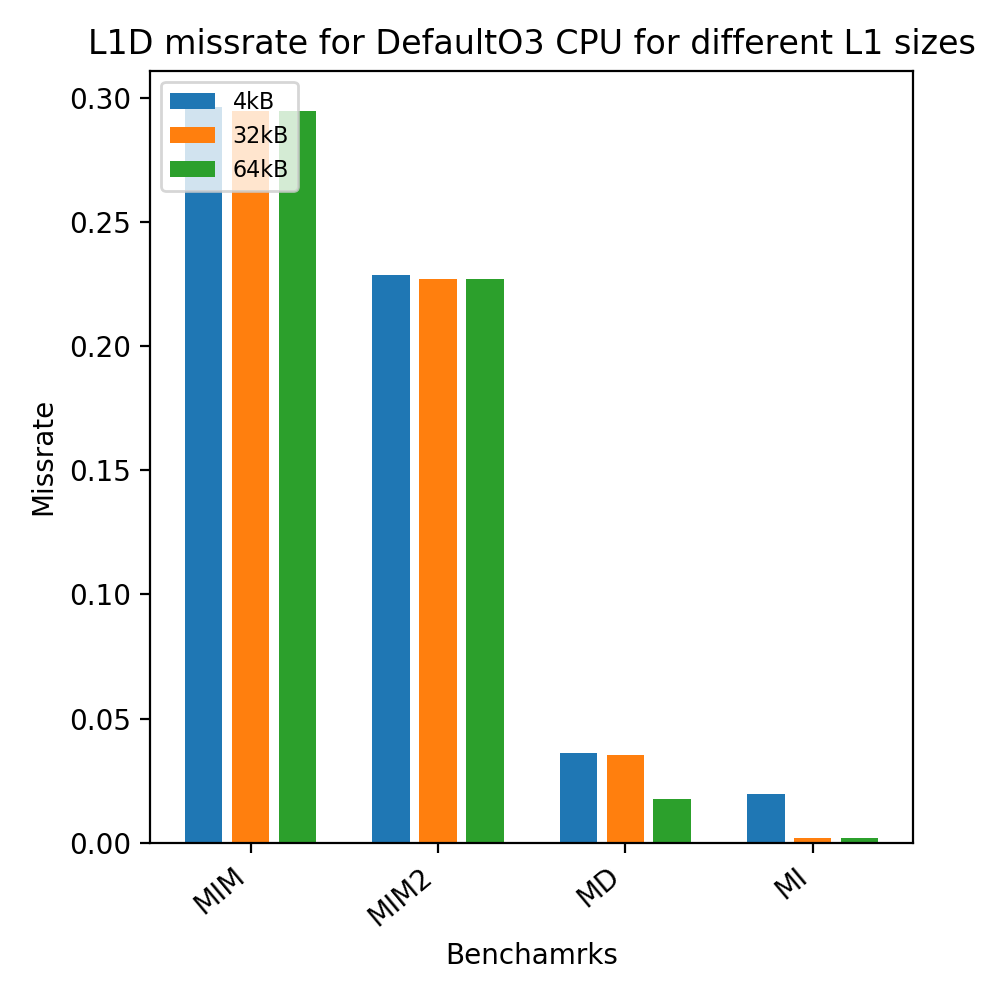

In [21]:
#DefaultO3 Benchmark L1D missrate.

benchmarks = L1D_cache
benchmark_names =  L1D_cache
sizes = ['4kB','32kB','64kB']
cpu = ['DefaultO3']
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,cpu,'overall_l1d_missrate','L1_cache',sizes,norm=False)
plt.ylabel('Missrate')
plt.xlabel('Benchamrks')
plt.legend(loc=2, prop={'size': 8})
plt.title('L1D missrate for DefaultO3 CPU for different L1 sizes')
plt.tight_layout()
plt.savefig('L1D_misses_DefaultO3.png', format='png', dpi=600)

## DefaultO3 L1D missrate : Compuslory miss

<IPython.core.display.Javascript object>


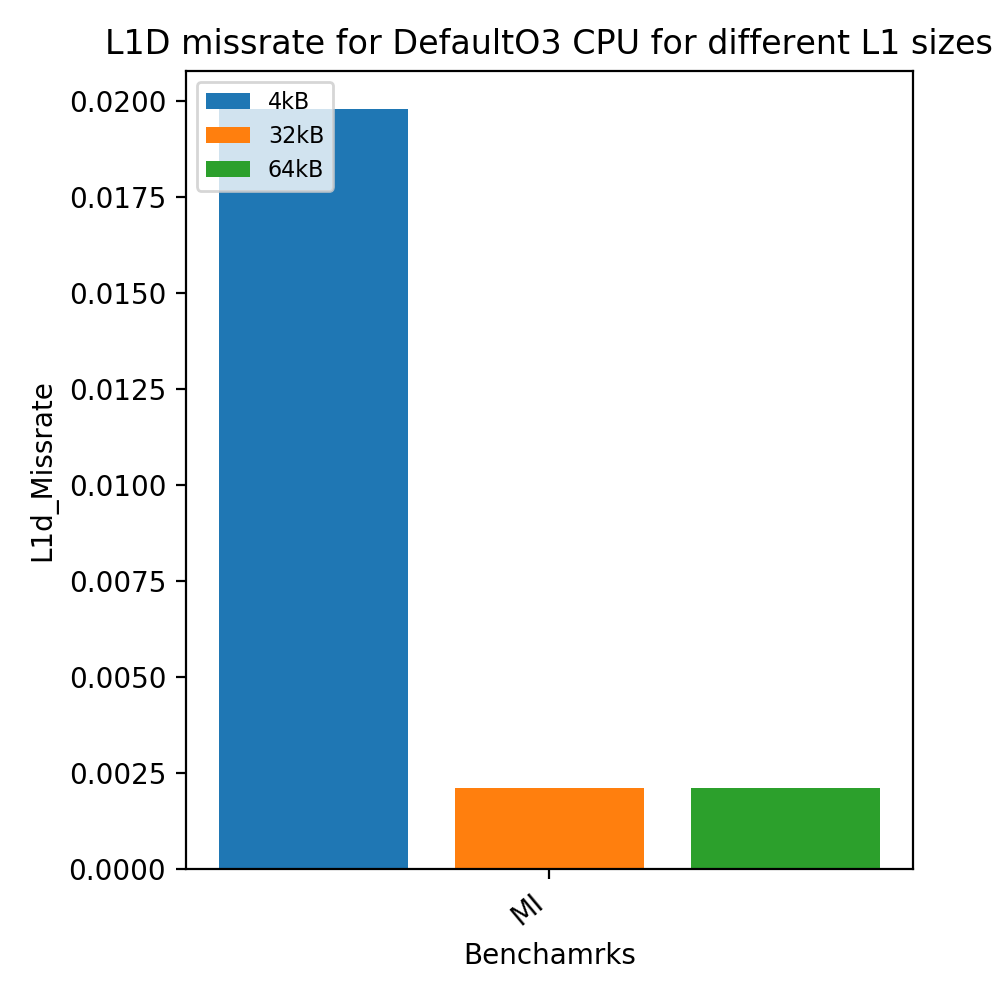

In [23]:
#DefaultO3 L1D missrate :Compuslory miss


benchmarks = ['MI']
benchmark_names =  ['MI']
sizes = ['4kB','32kB','64kB']
cpu = ['DefaultO3']
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,cpu,'overall_l1d_missrate','L1_cache',sizes,norm=False)
plt.ylabel('L1d_Missrate')
plt.xlabel('Benchamrks')
plt.legend(loc=2, prop={'size': 8})
plt.title('L1D missrate for DefaultO3 CPU for different L1 sizes')
plt.tight_layout()
plt.savefig('L1D_misses_compulsory_DefaultO3.png', format='png', dpi=600)

## DefaultO3 Benchmark L1D mshr_missrate

<IPython.core.display.Javascript object>


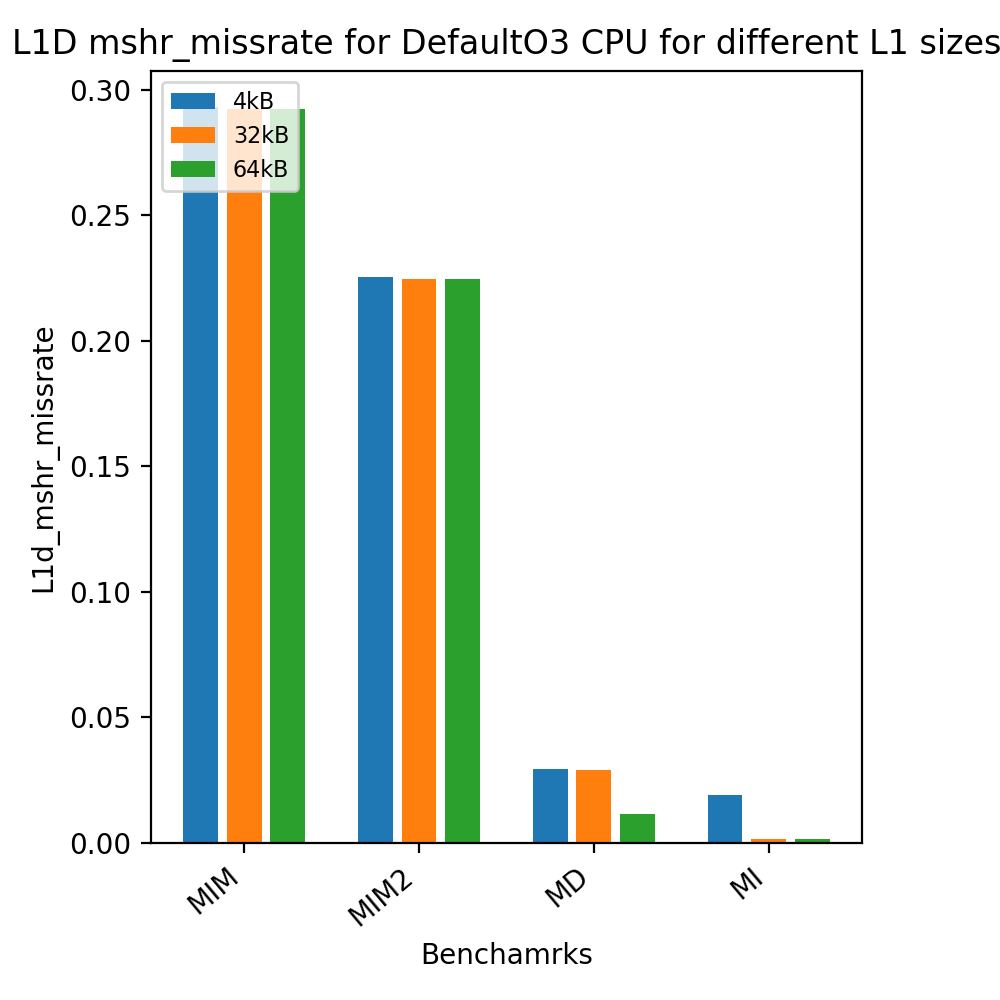

In [81]:
#DefaultO3 Benchmark L1D mshr_missrate.

benchmarks = L1D_cache
benchmark_names =  L1D_cache
sizes = ['4kB','32kB','64kB']
cpu = ['DefaultO3']
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,cpu,'overall_l1d_mshr_missrate','L1_cache',sizes,norm=False)
plt.ylabel('L1d_mshr_missrate')
plt.xlabel('Benchamrks')
plt.legend(loc=2, prop={'size': 8})
plt.title('L1D mshr_missrate for DefaultO3 CPU for different L1 sizes')
plt.tight_layout()
plt.savefig('L1D_mshr_misses_DefaultO3.png', format='png', dpi=600)

## SimpleCPU  L1D misses Different Assoc.

<IPython.core.display.Javascript object>


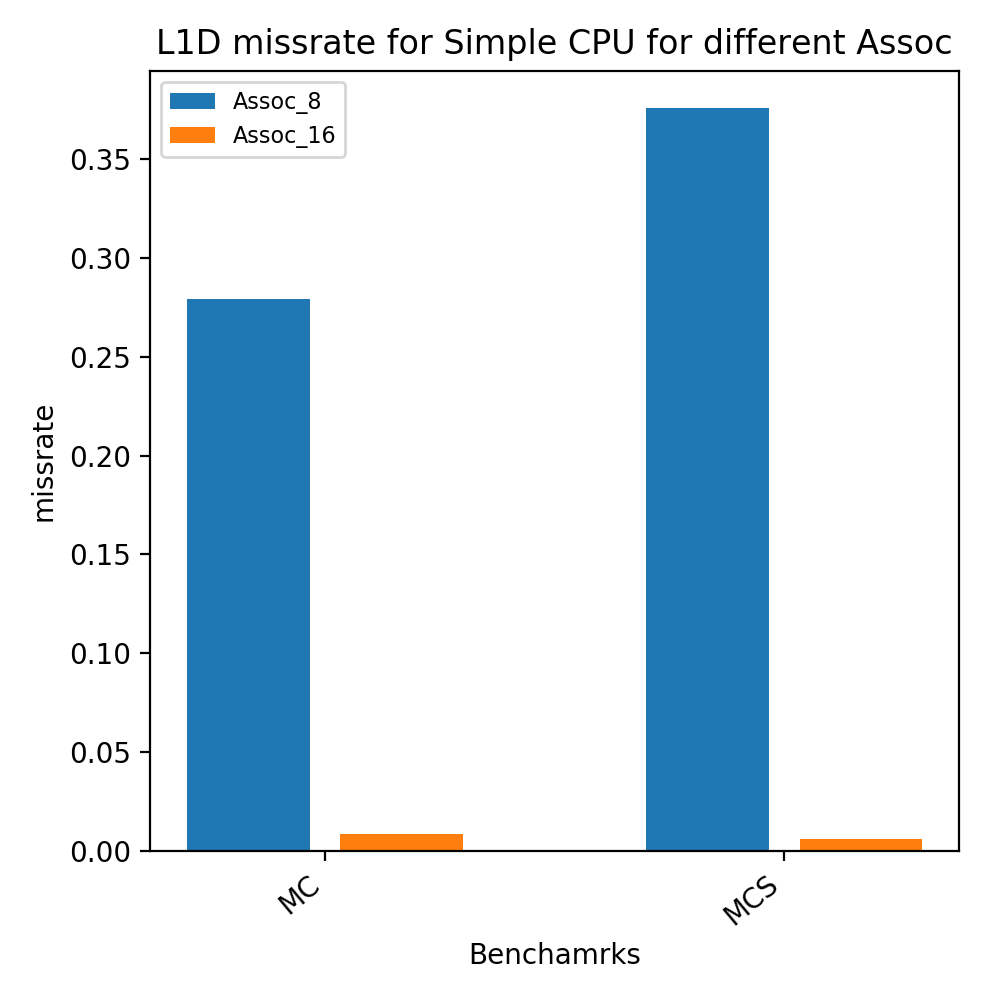

In [35]:
#Simple Benchmark L1D Assoc.

benchmarks = L1D_conflictmisses
benchmark_names =  L1D_conflictmisses
sizes = ['Assoc_8','Assoc_16']
cpu = ['Simple']
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,cpu,'overall_l1d_missrate','Assoc',sizes,norm=False)
plt.ylabel('missrate')
plt.xlabel('Benchamrks')
plt.legend(loc=2, prop={'size': 8})
plt.title('L1D missrate for Simple CPU for different Assoc')
plt.tight_layout()
plt.savefig('L1D_mshr_misses_Simple_conflict.png', format='png', dpi=600)

## DefaultO3 L1D misses Different Assoc

<IPython.core.display.Javascript object>


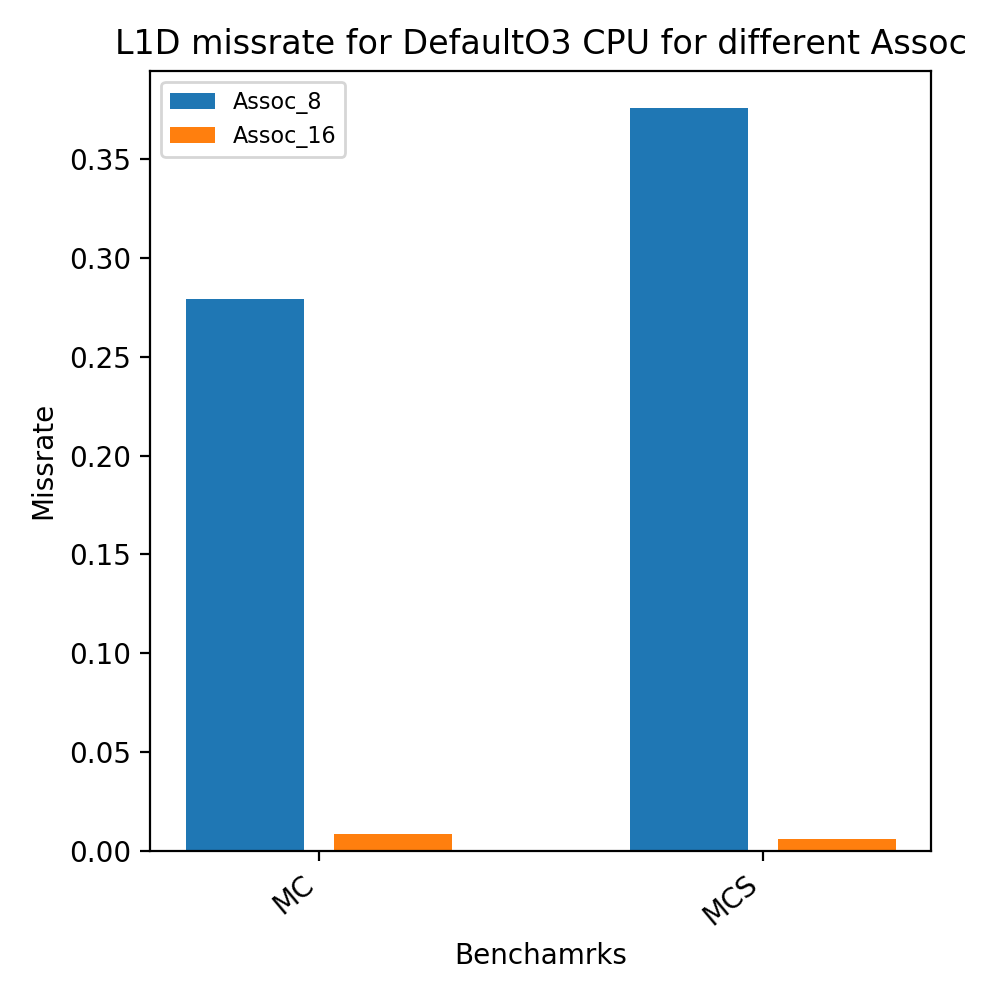

In [36]:
#DefaultO3 Benchmark L1D assoc.

benchmarks = L1D_conflictmisses
benchmark_names =  L1D_conflictmisses
sizes = ['Assoc_8','Assoc_16']
cpu = ['DefaultO3']
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,cpu,'overall_l1d_missrate','Assoc',sizes,norm=False)
plt.ylabel('issrate')
plt.xlabel('Benchamrks')
plt.legend(loc=2, prop={'size': 8})
plt.title('L1D missrate for DefaultO3 CPU for different Assoc')
plt.tight_layout()
plt.savefig('L1D_mshr_misses_conflict_DefaultO3.png', format='png', dpi=600)

# LI cache

<IPython.core.display.Javascript object>


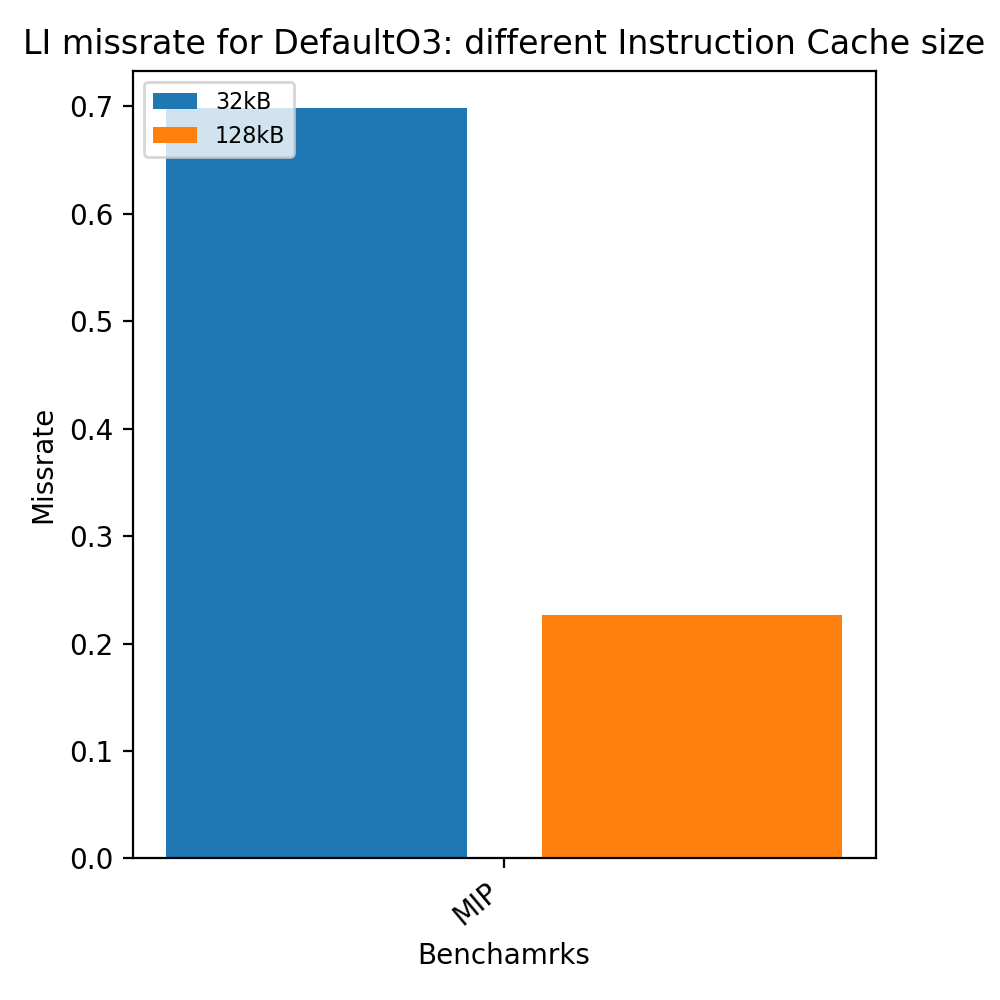

In [63]:
#Default o3  Benchmark LI cache

benchmarks = LI_cache
benchmark_names =  LI_cache
sizes = ['32kB','128kB']
cpu = ['DefaultO3']
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,cpu,'overall_li_missrate','LI_cache',sizes,norm=False)
plt.ylabel('Missrate')
plt.xlabel('Benchamrks')
plt.legend(loc=2, prop={'size': 8})
plt.title('LI missrate for DefaultO3: different Instruction Cache size')
plt.tight_layout()
plt.savefig('LI_misses_DefaultO3.png', format='png', dpi=600)

# L2 Cache

<IPython.core.display.Javascript object>


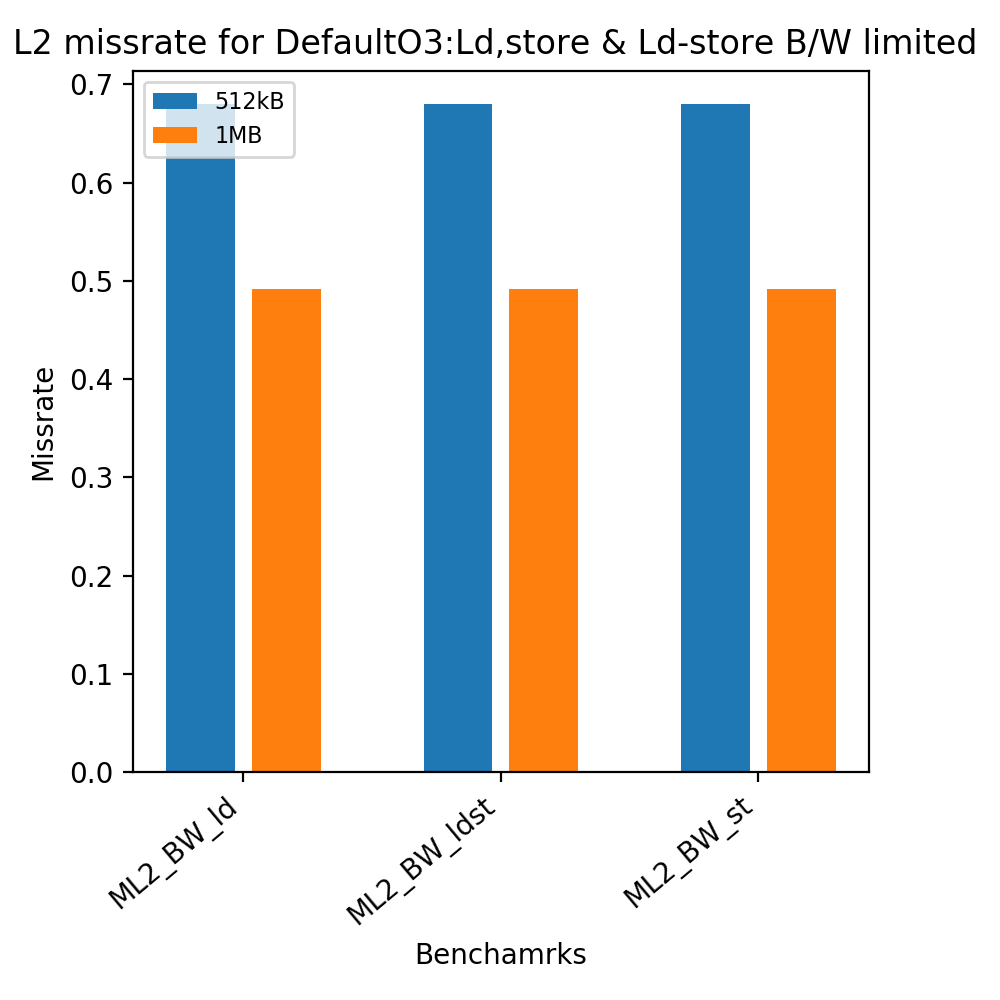

In [32]:
#Default O3  Benchmark L2 cache
benchmarks = L2_cache
benchmark_names =  L2_cache
sizes = ['512kB','1MB']
cpu = ['DefaultO3']
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
doplot_benchmarks(benchmarks,benchmark_names,cpu,'overall_miss_rate_L2','L2_cache',sizes,norm=False)
plt.ylabel('Missrate')
plt.xlabel('Benchamrks')
plt.legend(loc=2, prop={'size': 8})
plt.title('L2 missrate for DefaultO3:Ld,store & Ld-store B/W limited ')
plt.tight_layout()
plt.savefig('L2_misses_DefaultO3.png', format='png', dpi=600)